Case on Nairobi
Dataset:
shapefile of Nairobi
Annua Geomedian= 2020
1 secibd elevation model

Indices: BUI, ENDISI
Plot results for both BUI and ENDISI
DEM Interval 1000 to 2000 and categorize as very suitable, not suitable (<2000)

In [1]:
import datacube

In [2]:
dc=datacube.Datacube(app='assignment')

In [3]:
from deafrica_tools.datahandling import load_ard

In [4]:
import geopandas as gpd

/usr/local/lib/python3.8/dist-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [5]:
nairobi=gpd.read_file('nairobi_metro.shp')

In [6]:
nairobi.explore()

In [7]:
extent=nairobi.total_bounds
extent

array([36.58955126, -1.69136116, 37.42310586, -0.94474754])

In [8]:
x_range=(extent[0],extent[2])
y_range=(extent[1],extent[3])

In [9]:
dataset= dc.load(product='gm_ls8_annual',
        output_crs='EPSG:6933',
        resolution=(-30,30),
        x= x_range,
        y= y_range,
        time=('2020'),
        measurements = ['red','green','blue','nir','swir_1','swir_2'],
       )

In [10]:
height=dc.load(product='dem_srtm',
        output_crs='EPSG:6933',
        resolution=(-30,30),
        x= x_range,
        y= y_range,
        time=('2020'),
        measurements = ['elevation']
       )

In [11]:
from deafrica_tools.bandindices import calculate_indices

In [19]:
dataset= calculate_indices(dataset,index=['ENDISI','BUI','NDBI'],
                         satellite_mission='ls'
                           )

In [20]:
dataset

<xarray.Dataset>
Dimensions:      (time: 1, y: 3175, x: 2682)
Coordinates:
  * time         (time) datetime64[ns] 2020-07-01T23:59:59.999999
  * y            (y) float64 -1.205e+05 -1.206e+05 ... -2.157e+05 -2.157e+05
  * x            (x) float64 3.53e+06 3.53e+06 3.53e+06 ... 3.611e+06 3.611e+06
    spatial_ref  int32 6933
Data variables:
    red          (time, y, x) uint16 245 238 230 229 235 ... 572 522 580 586 633
    green        (time, y, x) uint16 394 378 363 356 360 ... 567 562 587 599 590
    blue         (time, y, x) uint16 154 148 142 144 148 ... 230 216 236 235 240
    nir          (time, y, x) uint16 2692 2476 2302 2249 ... 2868 2775 2793 2784
    swir_1       (time, y, x) uint16 1193 1139 1083 1072 ... 2047 2104 2148 2243
    swir_2       (time, y, x) uint16 541 519 498 501 509 ... 1131 1194 1212 1263
    ENDISI       (time, y, x) float64 -0.7123 -0.7208 ... -0.5366 -0.5336
    BUI          (time, y, x) float64 -1.219 -1.194 -1.178 ... -0.7837 -0.7371
    NDBI         (time, y, x) float64 -0.3858 -0.3698 ... -0.1305 -0.1076
Attributes:
    crs:           EPSG:6933
    grid_mapping:  spatial_ref

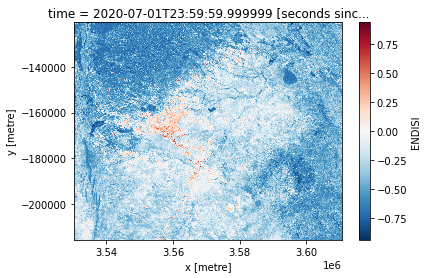

In [21]:
dataset['ENDISI'].plot()

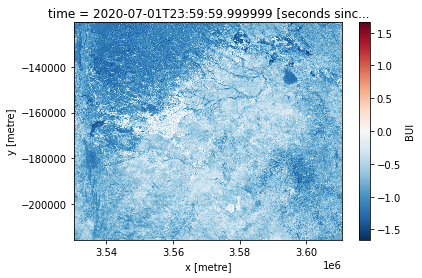

In [15]:
dataset['BUI'].plot()

In [53]:
NDBI=dataset['NDBI'].where(dataset['NDBI']>0)

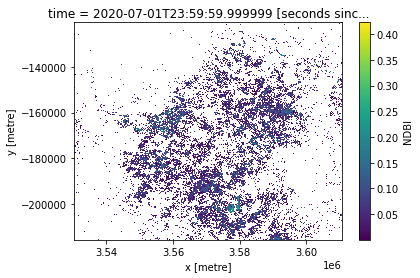

In [54]:
NDBI.plot()

In [55]:
import xarray as xr
import numpy as np

In [36]:
classess = [0, 1, 2]
class_label = ["Very_suitable", "suitable", "Not_suitable"]
class_colors=['#964B00','#00FF00','#90ee90']

conditions=[
    (height['elevation'] <1000),
    (height['elevation'] >=1000)&(height['elevation'] <=2000),
    (height['elevation'] >=2000)
    ]

selection = np.select(conditions, classess)

height['categorised_DEM'] = (xr.DataArray(selection, 
                                              coords={'time': height.time,
                                                      'y': height.y, 
                                                      'x': height.x},
                                              dims=['time', 'y', 'x']))

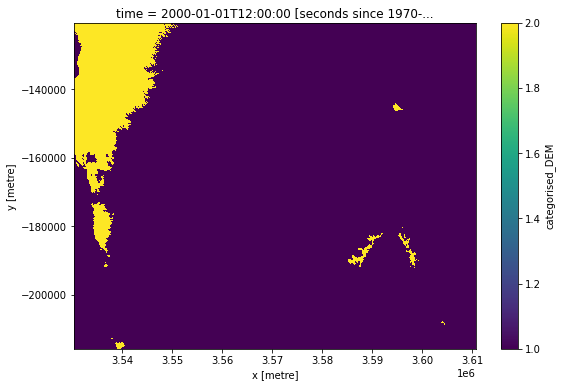

In [38]:
height['categorised_DEM'].isel(time=0).plot(size=6)

In [63]:
height['categorised_DEM'].plot(add_colorbar=False,cmap=cp)
NDBI.plot(add_colorbar=False)

NameError: name 'cp' is not defined

In [59]:
height['elevation'].plot(add_colorbar=False,cmap=color_map),
dataset['NDBI'].plot(add_colorbar=False)

NameError: name 'color_map' is not defined

In [60]:
cp=mcolors.ListedColormap(class_color,N=len(class_color)
height['categorised_DEM'].plot(add_colobar=False)

SyntaxError: invalid syntax (1655933842.py, line 2)

In [ ]:
height['categorised_dem].plot(add_colobar=False, cmap=cp)
       ndbi.plot(add_colorbar=False)

Classify urbanization only

In [ ]:
very_suitable=ndbi.where(height['categorised_dem']==2)
suitable=ndbi.where(height['categorised_dem']==1)   
not_suitable=ndbi.where(height['categorised_dem']==0)

In [34]:
c_green=mcolors.ListedColormap('green')
c_yellow=mcolors.ListedColormap('yellow')
c_red=mcolors.ListedColormap('red')

SyntaxError: cannot assign to operator (3441529008.py, line 2)

In [ ]:
very_suitable=mcolors.ListedColormap('green')
suitable=mcolors.ListedColormap('yellow')
not_suitable=mcolors.ListedColormap('red')